<a href="https://colab.research.google.com/github/chandhinipj/Diabetes-Prediction-Using-Neural-Network/blob/main/DL%26Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dataset from gdrive

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown 19sY9uzOFSqDHP491LXmDFmQjtONi-vhi
!gdown 1K7_VnB_TOjsRRoEEi1CJvvE0oS-u1_Zo

Downloading...
From: https://drive.google.com/uc?id=19sY9uzOFSqDHP491LXmDFmQjtONi-vhi
To: /content/test.csv
100% 3.22k/3.22k [00:00<00:00, 4.25MB/s]
Downloading...
From: https://drive.google.com/uc?id=1K7_VnB_TOjsRRoEEi1CJvvE0oS-u1_Zo
To: /content/train.csv
100% 23.3k/23.3k [00:00<00:00, 24.7MB/s]


In [ ]:
! pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.9 MB/s eta 0:00:00


# Importing  Libraries

In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn import metrics
import kerastuner as kt
# set random seeds to get reproducible results
import os
seed = 100
os.environ['PYTHONHASHSEED']=str(seed)
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow)

# Defining Early Stop method

EarlyStop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

<ipython-input-4-752a4141e5e4>:14: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


# Load and analyse the data set

• A1 - Number of times pregnant <br>
• A2 - Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
• A3 - Diastolic blood pressure (mm Hg)<br>
• A4 - Triceps skin fold thickness (mm)<br>
• A5 - 2-Hour serum insulin (mu U/ml)<br>
• A6 - Body mass index (weight in kg/(height in m)^2)<br>
• A7 - Diabetes pedigree function<br>
• A8 - Age (years)

In [ ]:
# load the data set
df = pd.read_csv('/content/train.csv')
# summarise the details
print(f'Number of entries: {len(df)}')
df.head()

Number of entries: 668


,id,A1,A2,A3,A4,A5,A6,A7,A8,class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      668 non-null    int64  
 1   A1      668 non-null    int64  
 2   A2      668 non-null    int64  
 3   A3      668 non-null    int64  
 4   A4      668 non-null    int64  
 5   A5      668 non-null    int64  
 6   A6      668 non-null    float64
 7   A7      668 non-null    float64
 8   A8      668 non-null    int64  
 9   class   668 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 52.3 KB


In [ ]:
df.describe()

,id,A1,A2,A3,A4,A5,A6,A7,A8,class
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,334.500000,3.812874,120.405689,68.748503,20.567365,79.654192,31.860180,0.477329,33.091317,0.345808
std,192.979273,3.365672,32.291473,19.526392,16.020600,115.827750,7.827111,0.341398,11.711386,0.475988
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,167.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.238750,24.000000,0.000000
50%,334.500000,3.000000,116.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,501.250000,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.641250,40.000000,1.000000
max,668.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

id       0
A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
class    0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

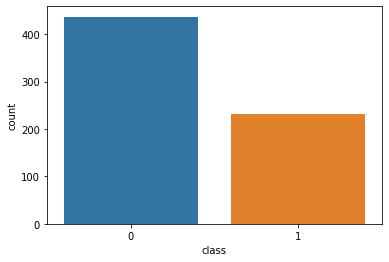

In [ ]:
# Summarise class details
sns.countplot(x=df['class'])

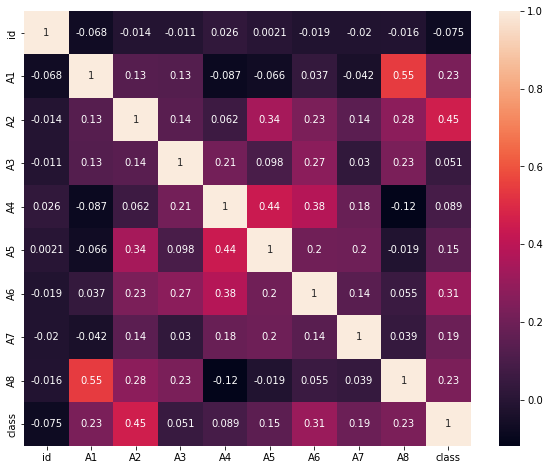

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)
#plt.title('Data Correlation')
plt.show()

# Extracting labels and features

In [ ]:
df['A2'] = df['A2'].replace(0, 140)
df['A3'] = df['A3'].replace(0, 60)
df['A4'] = df['A4'].replace(0, 8.5)
df['A5'] = df['A5'].replace(0, 9)
df['A6'] = df['A6'].replace(0, 18.5)

In [ ]:
# extract labels
y = df['class']

print(y.value_counts())

0    437
1    231
Name: class, dtype: int64


In [ ]:
# remove unnecessary columns
X = df.drop(['id', 'class'], axis=1)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      668 non-null    int64  
 1   A2      668 non-null    int64  
 2   A3      668 non-null    int64  
 3   A4      668 non-null    int64  
 4   A5      668 non-null    int64  
 5   A6      668 non-null    float64
 6   A7      668 non-null    float64
 7   A8      668 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 41.9 KB
None


,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:

# create LabelEncoder for labels
le = LabelEncoder()
le.fit(y)

LabelEncoder()

In [ ]:

# Convert labels into numeric values
y = le.transform(y)

y = pd.Series(y)
print(y.value_counts())

In [ ]:
from imblearn.over_sampling import SMOTE
# perform SMOTE oversampling
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [ ]:
print(y.value_counts())

0    437
1    231
Name: class, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

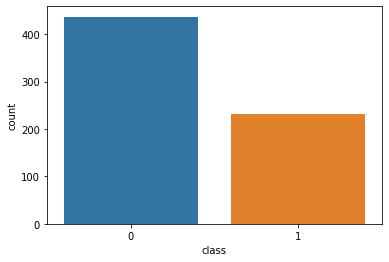

In [ ]:
sns.countplot(y)

In [ ]:
# Defining Early Stop method

EarlyStop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Model 1

## Split Data


In [ ]:
# remove unnecessary columns
X = df.drop(['id', 'class'], axis=1)
scaler = StandardScaler()
X =  scaler.fit_transform(X)

In [ ]:

# split data to train and validation sets
X_train1, X_val1, y_train1, y_val1 = train_test_split(X, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train1)}')
print(f'validation data set size: {len(X_val1)}')


training data set size: 467
validation data set size: 201


In [ ]:

# define the keras model
model1 = keras.Sequential()
model1.add(layers.Dense(64, input_dim=8, activation='relu'))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

# Define custom parameters
lr = 0.01
# beta_1 = 0.8
# beta_2 = 0.999
# epsilon = 1e-8

# Create Adam optimizer without decay
adam = Adam(learning_rate=lr)


In [ ]:
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='adam',
               metrics=['accuracy'])
# train model
m1 = model1.fit(X_train1, y_train1, batch_size=20, epochs=120,
                validation_data=(X_val1, y_val1), callbacks = [EarlyStop])

Epoch 1/120
24/24 [==============================] - 3s 46ms/step - loss: 0.6682 - accuracy: 0.6124 - val_loss: 0.5881 - val_accuracy: 0.7910
Epoch 2/120
24/24 [==============================] - 0s 10ms/step - loss: 0.5660 - accuracy: 0.7580 - val_loss: 0.5253 - val_accuracy: 0.7761
Epoch 3/120
24/24 [==============================] - 0s 10ms/step - loss: 0.5180 - accuracy: 0.7602 - val_loss: 0.4846 - val_accuracy: 0.7811
Epoch 4/120
24/24 [==============================] - 0s 16ms/step - loss: 0.4926 - accuracy: 0.7602 - val_loss: 0.4577 - val_accuracy: 0.7910
Epoch 5/120
24/24 [==============================] - 0s 8ms/step - loss: 0.4788 - accuracy: 0.7666 - val_loss: 0.4467 - val_accuracy: 0.7861
Epoch 6/120
24/24 [==============================] - 0s 13ms/step - loss: 0.4683 - accuracy: 0.7687 - val_loss: 0.4395 - val_accuracy: 0.7960
Epoch 7/120
24/24 [==============================] - 0s 10ms/step - loss: 0.4590 - accuracy: 0.7666 - val_loss: 0.4443 - val_accuracy: 0.7711
Epoch 8

In [ ]:
Model1_scores = model1.evaluate(X_val1, y_val1, verbose=0)
print("Accuracy: %f" % (Model1_scores[1]*100))
m1_val_accuracy = m1.history['val_accuracy'][-1] * 100
print("Validation Score: %f" % (m1_val_accuracy))

Accuracy: 80.597013
Validation Score: 78.109455


Text(0.5, 1.0, 'model accuracy')

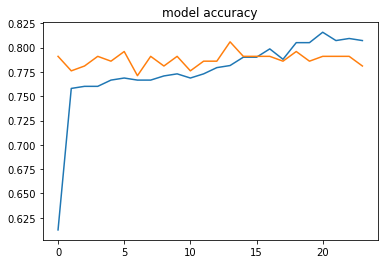

In [ ]:
import matplotlib.pyplot as plt
# summarize the history for accuracy
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('model accuracy')

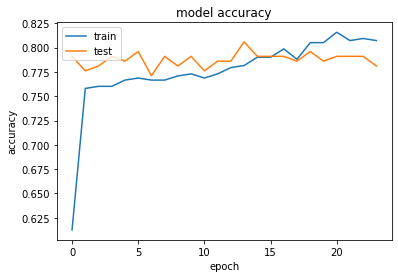

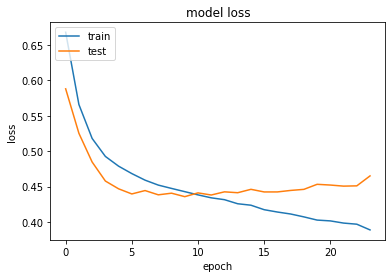

In [ ]:
# summarize the history for accuracy
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(m1.history['loss'])
plt.plot(m1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Validate Model 1

In [ ]:
# X = df.drop(['id', 'class'], axis=1)
# scaler = StandardScaler()
# X =  scaler.fit_transform(X)


predict_Test = model1.predict(X)

21/21 [==============================] - 0s 2ms/step


In [ ]:
test = [1 if pred > 0.5 else 0 for pred in predict_Test]
test[10:20]

[0, 1, 1, 1, 1, 0, 0, 0, 0, 0]

In [ ]:
y = df['class']
y[10:20]

In [ ]:
df['class'][:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: class, dtype: int64

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
import numpy  as np

MSE = np.square(np.subtract(y,test)).mean()

RMSE = sqrt(MSE)
print(MSE, RMSE)
from sklearn.metrics import accuracy_score
print(f'accuracy {accuracy_score(y,test)}')

0.2125748502994012 0.4610584022652675
accuracy 0.7874251497005988


In [ ]:
# clear session
keras.backend.clear_session()
keras.utils.set_random_seed(seed)


# Model 2

In [ ]:

from sklearn.preprocessing import StandardScaler
# Data split for train and validation
X = df.iloc[:, [0,1,2,5,7,6]]
scaler = StandardScaler()
X =  scaler.fit_transform(X)

In [ ]:
# split data to train and validation sets
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train2)}')
print(f'validation data set size: {len(X_val2)}')

training data set size: 467
validation data set size: 201


In [ ]:
# define the keras model
model2 = keras.Sequential()
model2.add(layers.Dense(64, input_dim=6, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the model
# m2 = model2.fit(X_train2, y_train2, batch_size=20, epochs=120, validation_data=(X_val2, y_val2))
m2 = model2.fit(X_train2, y_train2, batch_size=20, epochs=120, validation_data=(X_val2, y_val2) ,  callbacks = [EarlyStop])
Model2_scores = model2.evaluate(X_val2, y_val2, verbose=0)

Epoch 1/120
24/24 [==============================] - 2s 14ms/step - loss: 0.6876 - accuracy: 0.5375 - val_loss: 0.6097 - val_accuracy: 0.7861
Epoch 2/120
24/24 [==============================] - 0s 4ms/step - loss: 0.5954 - accuracy: 0.7430 - val_loss: 0.5360 - val_accuracy: 0.7711
Epoch 3/120
24/24 [==============================] - 0s 5ms/step - loss: 0.5441 - accuracy: 0.7495 - val_loss: 0.4900 - val_accuracy: 0.7811
Epoch 4/120
24/24 [==============================] - 0s 5ms/step - loss: 0.5149 - accuracy: 0.7645 - val_loss: 0.4684 - val_accuracy: 0.7960
Epoch 5/120
24/24 [==============================] - 0s 5ms/step - loss: 0.4996 - accuracy: 0.7666 - val_loss: 0.4588 - val_accuracy: 0.7861
Epoch 6/120
24/24 [==============================] - 0s 5ms/step - loss: 0.4892 - accuracy: 0.7709 - val_loss: 0.4569 - val_accuracy: 0.7910
Epoch 7/120
24/24 [==============================] - 0s 5ms/step - loss: 0.4823 - accuracy: 0.7773 - val_loss: 0.4622 - val_accuracy: 0.7861
Epoch 8/120


In [ ]:
print("Accuracy: %f" % (Model2_scores[1]*100))
m2_val_accuracy = m2.history['val_accuracy'][-1] * 100
print("Validation Score: %f" % (m2_val_accuracy))

Accuracy: 81.592041
Validation Score: 80.099505


Text(0.5, 1.0, 'model accuracy')

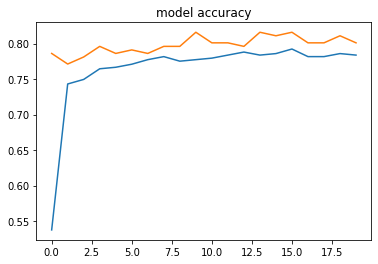

In [ ]:
import matplotlib.pyplot as plt
# summarize the history for accuracy
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.title('model accuracy')

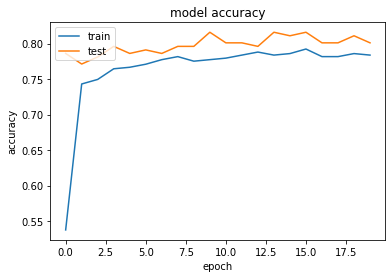

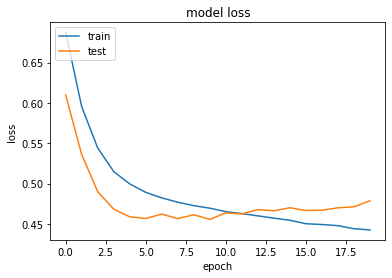

In [ ]:
# summarize the history for accuracy
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(m2.history['loss'])
plt.plot(m2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Validate Model

In [ ]:
predict_Test = model2.predict(X)

21/21 [==============================] - 0s 2ms/step


In [ ]:
# get model predictions
test = [1 if pred > 0.5 else 0 for pred in predict_Test]
test[0:10]

[1, 0, 1, 0, 1, 0, 0, 0, 1, 0]

In [ ]:
df['class'][:10]


0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: class, dtype: int64

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
import numpy  as np

MSE = np.square(np.subtract(y,test)).mean()

RMSE = sqrt(MSE)
print(MSE, RMSE)
from sklearn.metrics import accuracy_score
print(f'accuracy {accuracy_score(y,test)}')

0.20958083832335328 0.4577999981688
accuracy 0.7904191616766467


# Model 3

In [ ]:
# Data split for train and validation
X = df.iloc[:, [0,1,3,4,5,7]]
scaler = StandardScaler()
X =  scaler.fit_transform(X)

In [ ]:
# split data to train and validation sets
X_train3, X_val3, y_train3, y_val3 = train_test_split(X, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train3)}')
print(f'validation data set size: {len(X_val3)}')

training data set size: 467
validation data set size: 201


In [ ]:
# define the keras model
model3 = keras.Sequential()
model3.add(layers.Dense(12, input_dim=6, activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                84        
                                                                 
 dense_4 (Dense)             (None, 32)                416       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the keras model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the model
# m3 = model3.fit(X_train3, y_train3, batch_size=20, epochs=120, validation_data=(X_val3, y_val3))
m3 = model3.fit(X_train3, y_train3, batch_size=20, epochs=120, validation_data=(X_val3, y_val3) ,  callbacks = [EarlyStop])
model3_scores = model3.evaluate(X_val3, y_val3, verbose=0)

Epoch 1/120
24/24 [==============================] - 4s 49ms/step - loss: 0.6807 - accuracy: 0.5846 - val_loss: 0.6597 - val_accuracy: 0.6418
Epoch 2/120
24/24 [==============================] - 0s 12ms/step - loss: 0.6397 - accuracy: 0.6531 - val_loss: 0.6369 - val_accuracy: 0.6866
Epoch 3/120
24/24 [==============================] - 0s 15ms/step - loss: 0.6228 - accuracy: 0.6681 - val_loss: 0.6253 - val_accuracy: 0.7015
Epoch 4/120
24/24 [==============================] - 0s 12ms/step - loss: 0.6149 - accuracy: 0.6767 - val_loss: 0.6164 - val_accuracy: 0.7164
Epoch 5/120
24/24 [==============================] - 0s 11ms/step - loss: 0.6081 - accuracy: 0.6745 - val_loss: 0.6102 - val_accuracy: 0.7214
Epoch 6/120
24/24 [==============================] - 0s 13ms/step - loss: 0.6016 - accuracy: 0.6831 - val_loss: 0.6070 - val_accuracy: 0.7164
Epoch 7/120
24/24 [==============================] - 1s 25ms/step - loss: 0.5967 - accuracy: 0.6895 - val_loss: 0.6038 - val_accuracy: 0.7114
Epoch 

In [ ]:
print("Accuracy: %f" % (model3_scores[1]*100))
m3_val_accuracy = m3.history['val_accuracy'][-1] * 100
print("Validation Score: %f" % (m3_val_accuracy))

Accuracy: 72.139305
Validation Score: 71.144277


# Test Predictions

## prediction on test data using Model 1

In [ ]:
df_test = pd.read_csv('/content/test.csv')

# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['id'], axis=1)
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


In [ ]:
m1_predict = df_test.copy()
m1_predict.drop(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'], axis = 1, inplace = True  )
df_test.drop('id', axis = 1, inplace = True)

In [ ]:
m1_predict

In [ ]:

scaler = StandardScaler()
X_test =  scaler.fit_transform(X_test)

In [ ]:
X_test

In [ ]:
predict = model1.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
m1_predict['prediction'] = [1 if pred > 0.5 else 0 for pred in predict]
print(m1_predict['prediction'])

0     0
1     1
2     1
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: prediction, Length: 100, dtype: int64


In [ ]:
m1_predict.head()

,id,prediction
0,1,0
1,2,1
2,3,1
3,4,0
4,5,0


In [ ]:
(m1_predict['prediction'] == 0 ).value_counts()

True     70
False    30
Name: prediction, dtype: int64

In [ ]:
# To convert the prediction values into Json file
import json

import pandas as pd

data = []
for index, row in m1_predict.iterrows():
    data.append({'id': int(row['id']), 'prediction': int(row['prediction'])})

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))

## prediction on test data using Model 2

In [ ]:
df_test = pd.read_csv('/content/test.csv')

# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['id'], axis=1)
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


In [ ]:
m2_predict = df_test.copy()
m2_predict.drop(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'], axis = 1, inplace = True  )
df_test.drop('id', axis = 1, inplace = True)

In [ ]:
X_test = df_test.iloc[:, [0,1,2,5,7,6]]

scaler = StandardScaler()
X_test =  scaler.fit_transform(X_test)

In [ ]:
predict = model2.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
m2_predict['prediction'] = [1 if pred > 0.5 else 0 for pred in predict]
print(m2_predict['prediction'])

0     0
1     0
2     1
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: prediction, Length: 100, dtype: int64


In [ ]:
(m2_predict['prediction'] == 0 ).value_counts()

True     69
False    31
Name: prediction, dtype: int64

In [ ]:
# To convert the prediction values into Json file
import json

import pandas as pd

data = []
for index, row in m2_predict.iterrows():
    data.append({'id': int(row['id']), 'prediction': int(row['prediction'])})

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))